# Import Data

In [69]:
import os
import pandas as pd

IRIS_PATH="datasets"
iris_column_names=['sepal_length','sepal_width','petal_length','petal_width','species']

def load_iris_data(iris_path=IRIS_PATH):
    csv_path = os.path.join(iris_path,"iris.data")
    return pd.read_csv(csv_path,names=iris_column_names)

iris_data = load_iris_data()
iris_species = iris_data['species'].drop_duplicates().to_list()
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Explore Data

In [70]:
#describes a DataFrame's columns, nullity, and type
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
#determine classes
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [72]:
#determine class balance
iris_data['species'].value_counts()/len(iris_data)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

In [73]:
#calculate summary statistics for numerical features
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


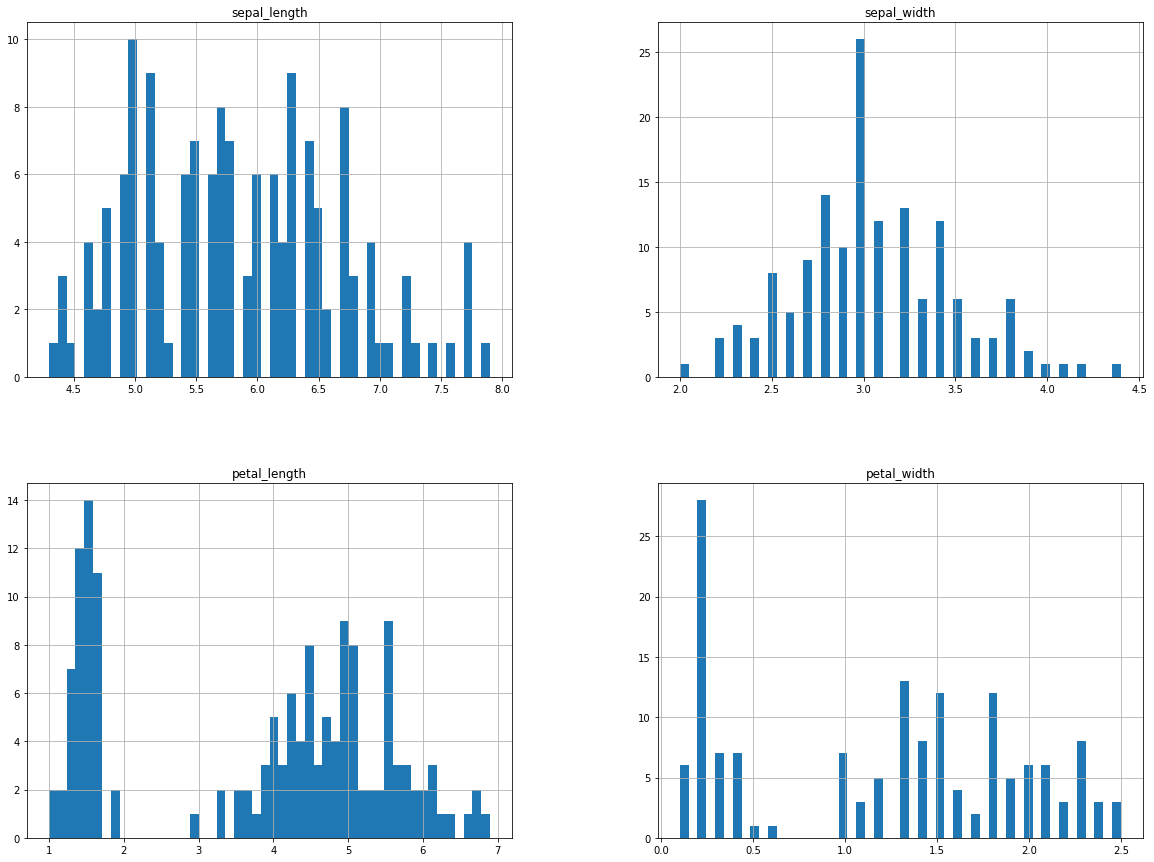

In [74]:
#plot histograms of 
%matplotlib inline
import matplotlib.pyplot as plt
iris_data.hist(bins=50, figsize=(20,15))
plt.show()

# Split Dataset before Further Exploration!

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris_data, iris_data['species']):
    strat_train_set = iris_data.loc[train_index]
    strat_test_set = iris_data.loc[test_index]

In [76]:
#check stratification on training set
strat_train_set['species'].value_counts()/len(strat_train_set)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: species, dtype: float64

In [77]:
#check stratification on test set
strat_test_set['species'].value_counts()/len(strat_test_set)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: species, dtype: float64

In [78]:
#copy for manipulating
iris_copy=strat_train_set.copy()

In [79]:
#convert species label to integer
def pandas_convert_to_ordinal(original_df,cols,inplace=False):
    if not inplace:
        df=original_df.copy()
    else:
        df=original_df
        
    for col in cols:
        keys=df[col].drop_duplicates().to_list()
        values=list(range(len(keys)))
        df[col].replace(keys,values, inplace=True)
    
    return df

iris_copy=pandas_convert_to_ordinal(iris_copy,['species'],inplace=True)

In [80]:
#calculate the correlation matrix
corr_matrix=iris_copy.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.102489,0.880418,0.820282,0.460697
sepal_width,-0.102489,1.000000,-0.388603,-0.326891,-0.600218
petal_length,0.880418,-0.388603,1.000000,0.963554,0.643093
petal_width,0.820282,-0.326891,0.963554,1.000000,0.572949
species,0.460697,-0.600218,0.643093,0.572949,1.000000


In [81]:
corr_matrix['species'].sort_values(ascending=False)

species         1.000000
petal_length    0.643093
petal_width     0.572949
sepal_length    0.460697
sepal_width    -0.600218
Name: species, dtype: float64

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='species', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='species', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='species', ylabel='petal_length'>],
   

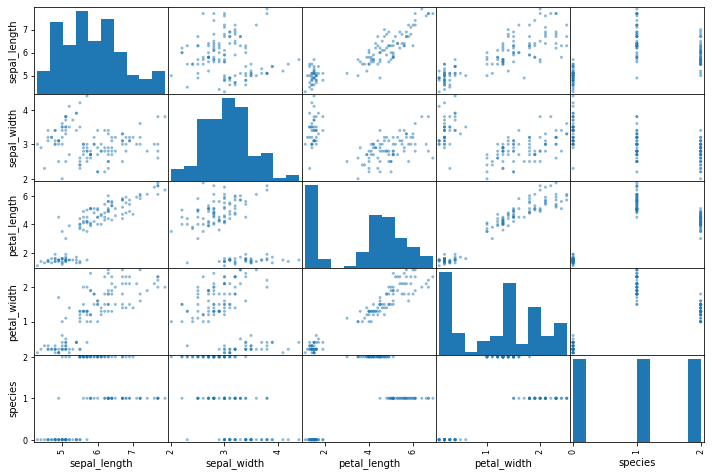

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_copy,figsize=(12,8))

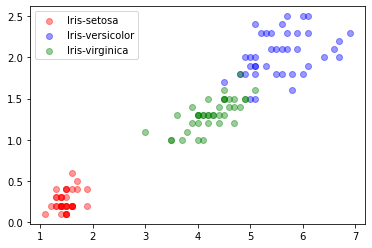

In [83]:
#make scatter plot of petal length vs. petal width

fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for i in range(3):
    ax.scatter(x=iris_copy[iris_copy["species"]==i]["petal_length"].to_numpy(),
        y=iris_copy[iris_copy["species"]==i]["petal_width"].to_numpy(),
        alpha=0.4,label=iris_species[i],
        c=cdict[i])
ax.legend()
plt.show()

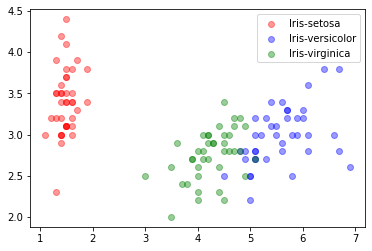

In [84]:
#make scatter plot of petal length vs. sepal width

fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for i in range(3):
    ax.scatter(x=iris_copy[iris_copy["species"]==i]["petal_length"].to_numpy(),
        y=iris_copy[iris_copy["species"]==i]["sepal_width"].to_numpy(),
        alpha=0.4,label=iris_species[i],
        c=cdict[i])
ax.legend()
plt.show()

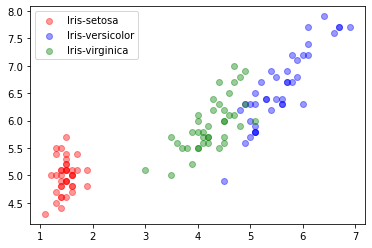

In [85]:
#make scatter plot of petal length vs. sepal length

fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for i in range(3):
    ax.scatter(x=iris_copy[iris_copy["species"]==i]["petal_length"].to_numpy(),
        y=iris_copy[iris_copy["species"]==i]["sepal_length"].to_numpy(),
        alpha=0.4,label=iris_species[i],
        c=cdict[i])
ax.legend()
plt.show()

# Machine Learning

In [86]:
#separate features and labels
X_train = strat_train_set.drop('species',axis=1)
Y_train = strat_train_set['species']
X_test = strat_test_set.drop('species',axis=1)
Y_test = strat_test_set['species']

In [87]:
#train Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [88]:
#check training fit
from sklearn.metrics import accuracy_score
Y_pred_train = gnb.predict(X_train)
accuracy_score(Y_train,Y_pred_train)

0.9583333333333334

# Model Evaluation

In [89]:
#compute on test set
Y_pred_test = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_test)

0.9666666666666667

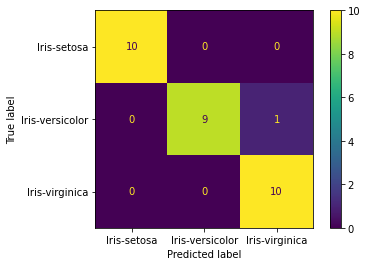

In [90]:
#Compute and display confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
gnb_cm = confusion_matrix(Y_test,Y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
disp.plot()
plt.show()

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [92]:
#check training fit
from sklearn.metrics import accuracy_score
dt_Y_pred_train = dt.predict(X_train)
accuracy_score(Y_train,dt_Y_pred_train)

1.0

In [93]:
#compute on test set
dt_Y_pred_test = dt.predict(X_test)
accuracy_score(Y_test,dt_Y_pred_test)

0.9666666666666667

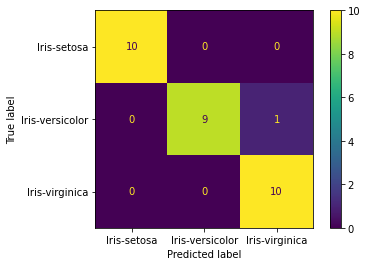

In [94]:
#Compute and display confusion matrix
dt_cm = confusion_matrix(Y_test,dt_Y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                            display_labels=dt.classes_)
disp.plot()
plt.show()

In [96]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 'dt_iris.dot',
                feature_names = iris_column_names[:-1],
                class_names=dt.classes_,
                rounded=True,
               filled=True)

In [97]:
! dot -Tpng dt_iris.dot -o dt_iris.png

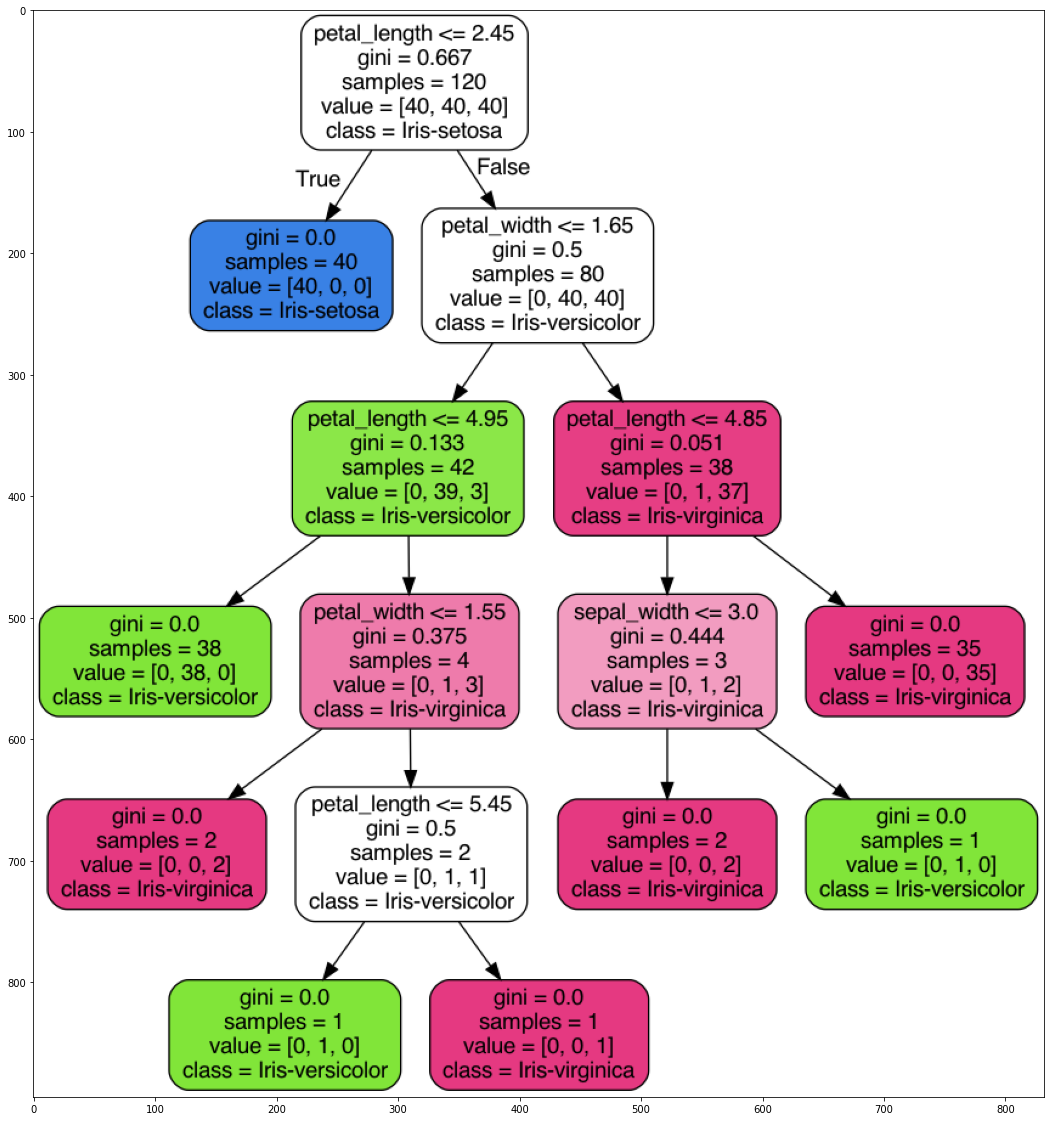

In [98]:
import cv2
%matplotlib inline
img = cv2.imread('dt_iris.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## Estimating Probabilities

In [ ]:
sample1=[5.1, 3.5, 1.4, 0.2]
sample2=[7.0,3.2,4.7,1.4]
print(dt.predict_proba([sample1]))
print(dt.predict_proba([sample2]))

## Regularization

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [100]:
#compute on test set
dt2_Y_pred_test = dt2.predict(X_test)
accuracy_score(Y_test,dt2_Y_pred_test)

0.9333333333333333

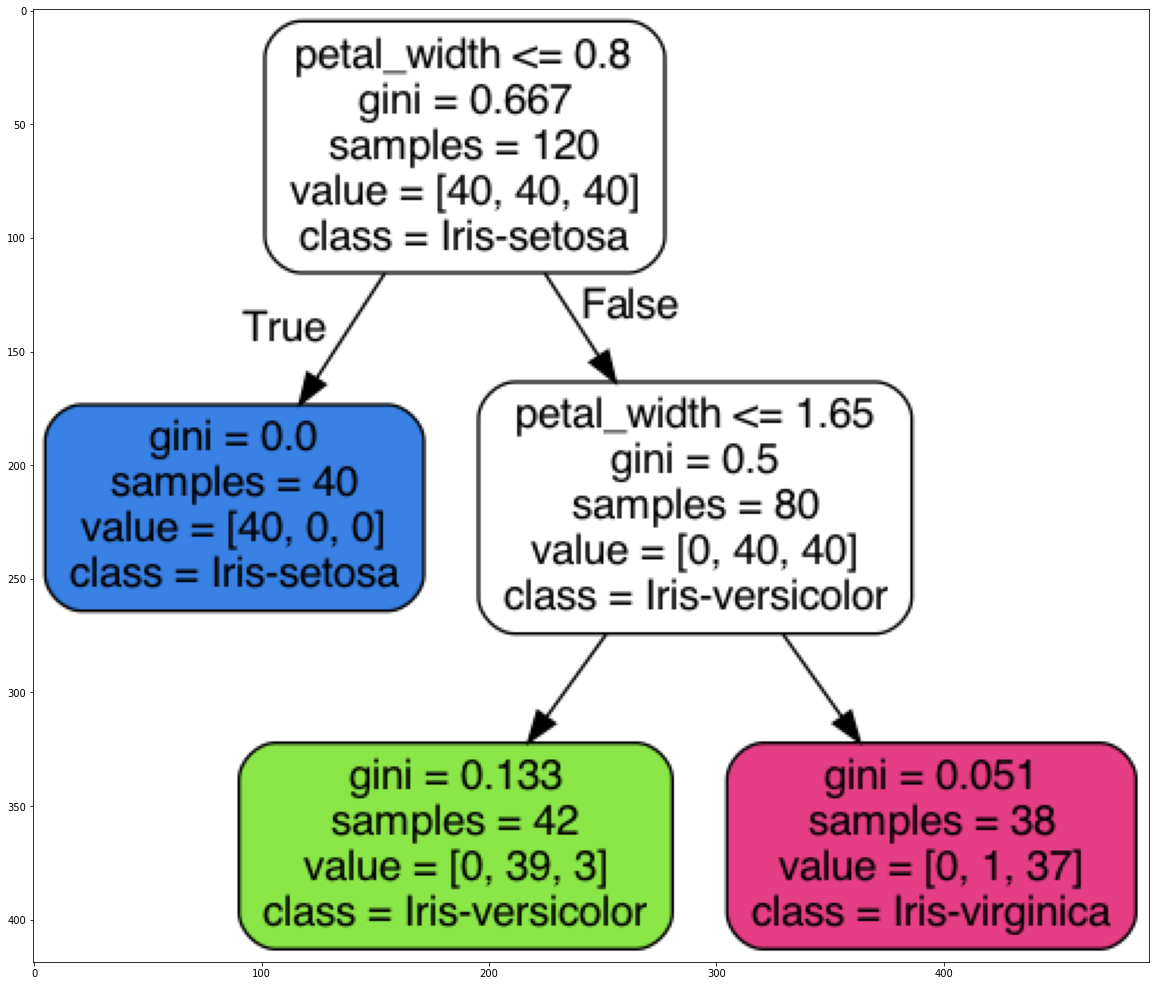

In [102]:
from sklearn.tree import export_graphviz
export_graphviz(dt2, 'dt2_iris.dot',
                feature_names = iris_column_names[:-1],
                class_names=dt2.classes_,
                rounded=True,
               filled=True)
! dot -Tpng dt2_iris.dot -o dt2_iris.png
%matplotlib inline
img = cv2.imread('dt2_iris.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)